<a href="https://colab.research.google.com/github/m123m12/Netflix-movies-and-TV-shows-clustering/blob/main/Netflix_movies_and_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name: Netflix movies and TV shows clustering(Unsupervised ML)**

**Name        : GRANDHI MADHAVA NAIDU**

Github link: https://github.com/m123m12/Netflix-movies-and-TV-shows-clustering

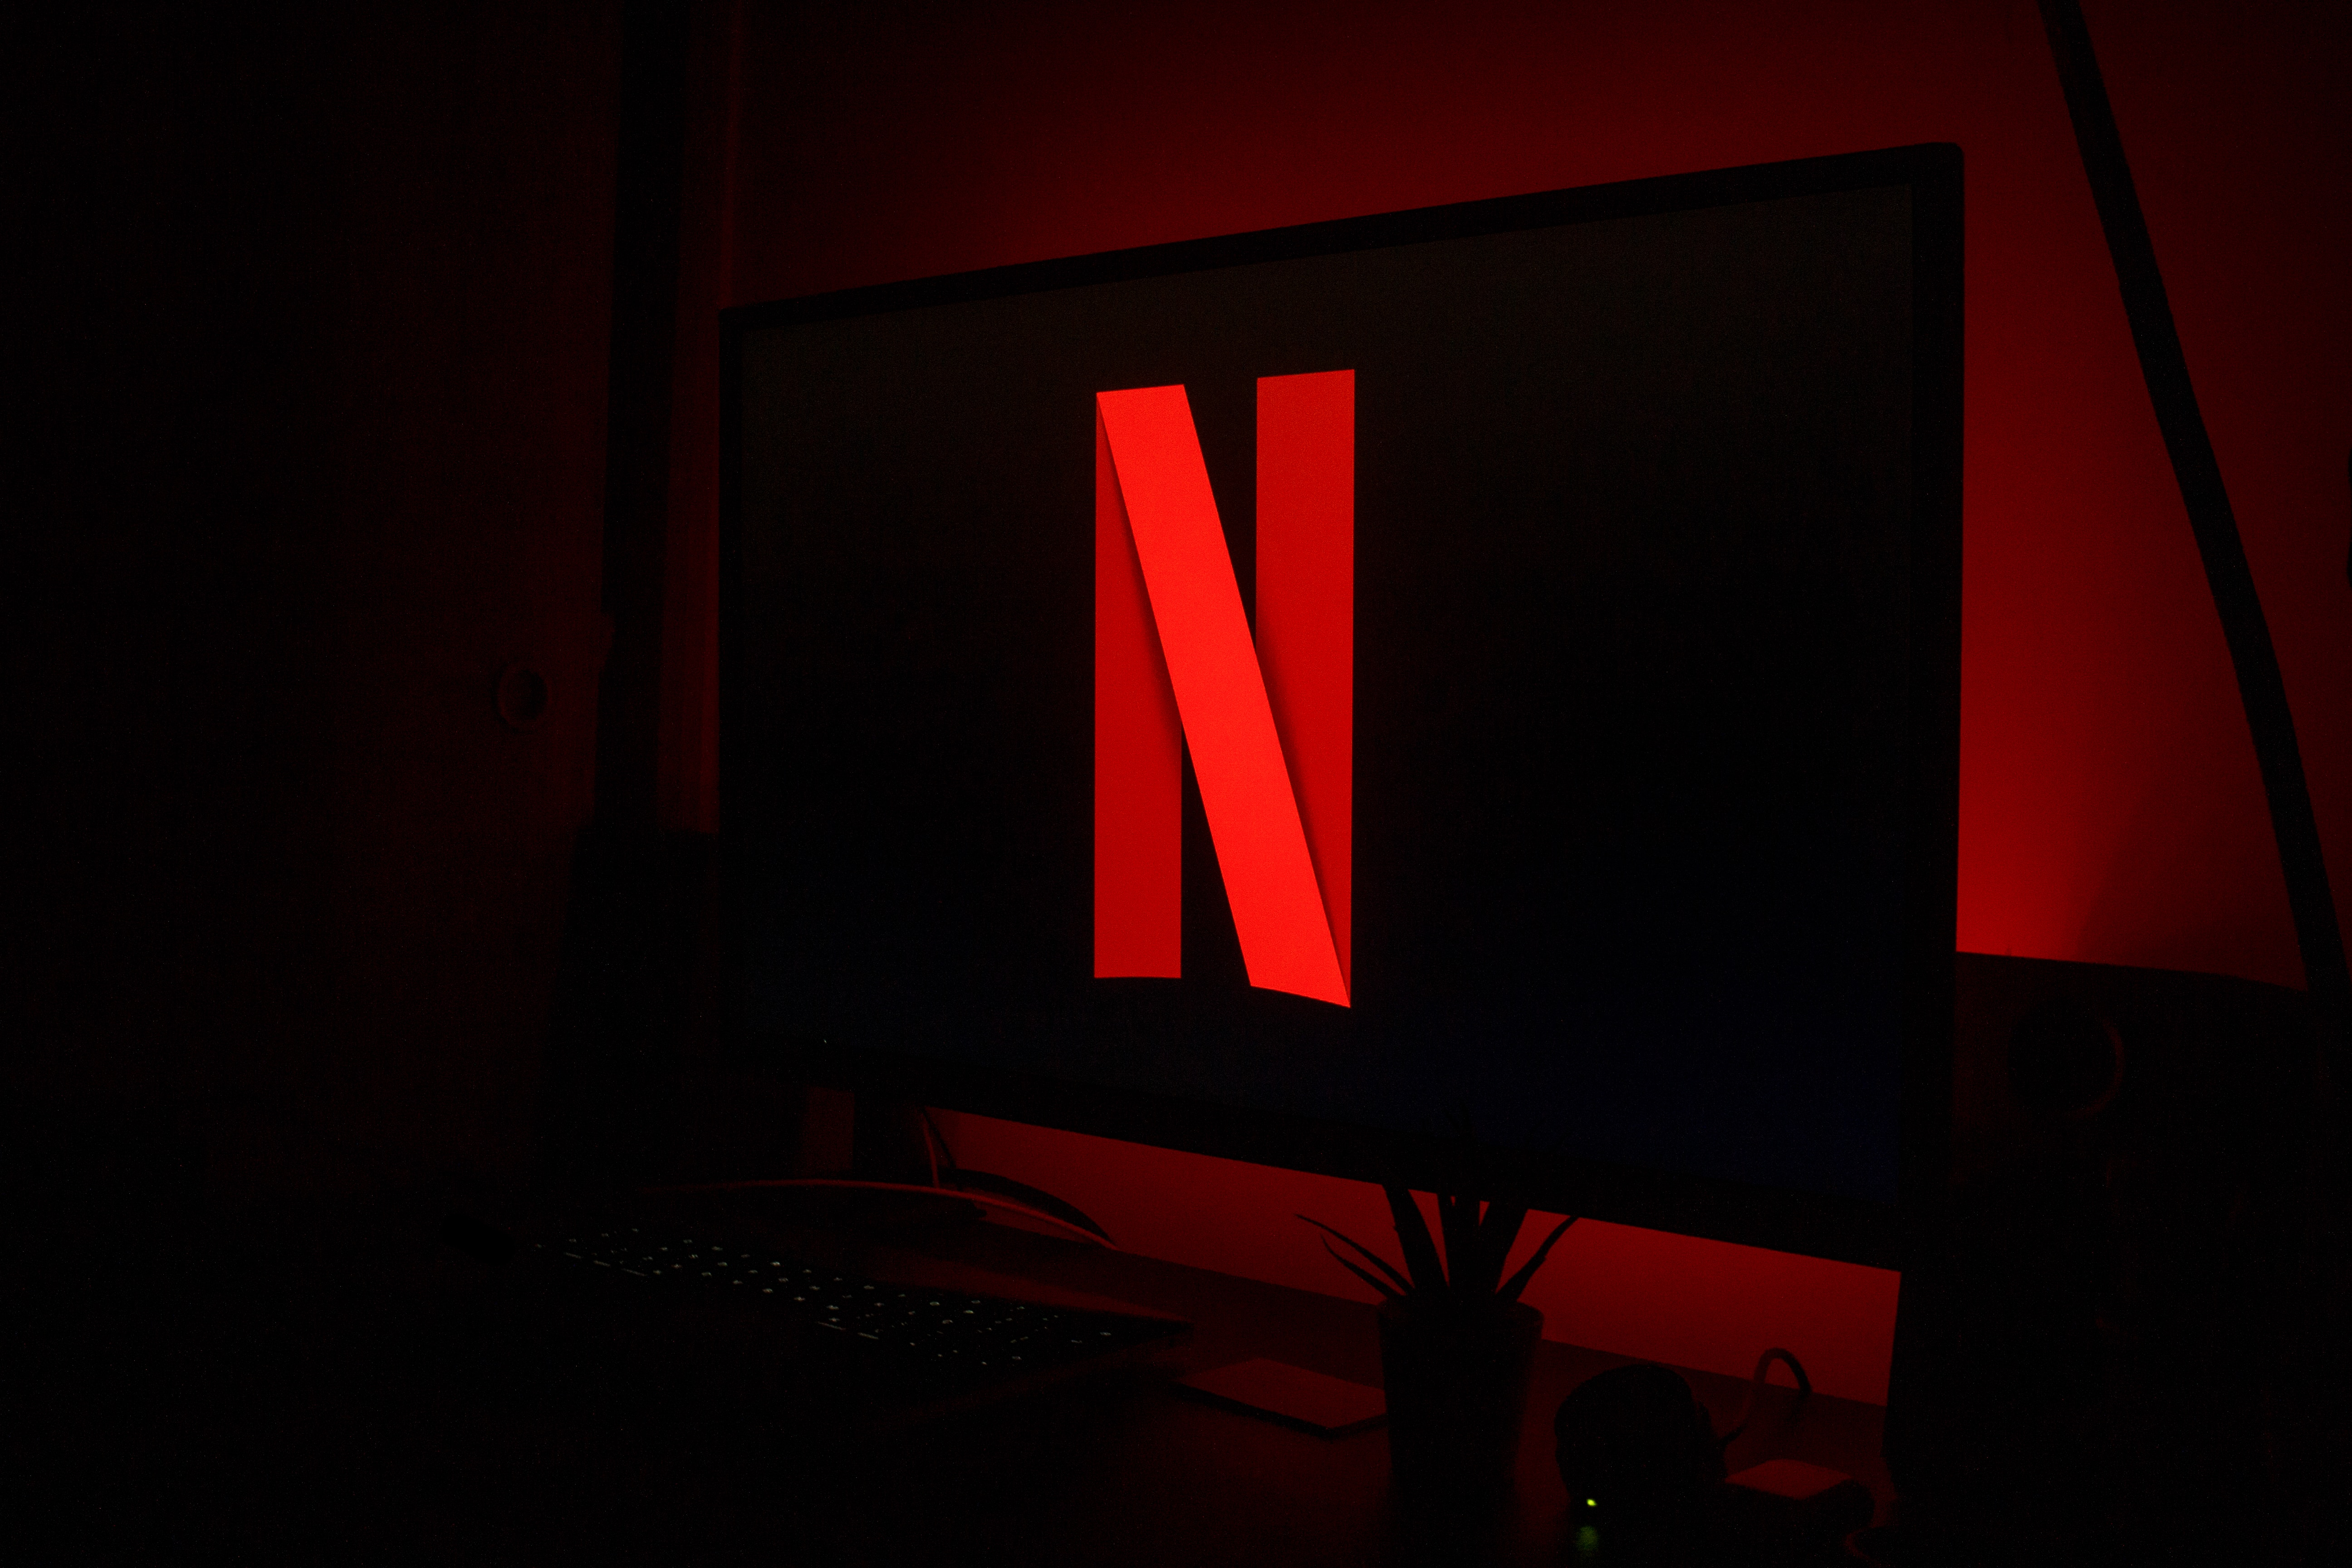

**Project Description:**

**Business context:**

This data set consists of TV shows and movies available on Netflix as of 2019.The dataset is collected from flixable which is a third party Netflix search engine. In 2018 ,they released an iteresting report which shows that number of TV shows on Netflix has nearly tripled since 2010.The streaming services number of movies has decreased by more than 2000 titles since 2010,while its number of TV shows has neaerly tripled.It will be interesting to explore what all other insights can be obtained from the same dataset.

**Busines objective:**

In this project dataset consists of tv shows and movies available on Netflix as of 2019.The aim of this project is to find clusters.In this project, required to do: (1)Exploratory Data Analysis, (2) Understanding what type content is available in different countries, (3) Is Netflix has increasingly focusing on TV rather than movies in recent years, (4) Clustering similar content by matching text-based features.

**Data description:**

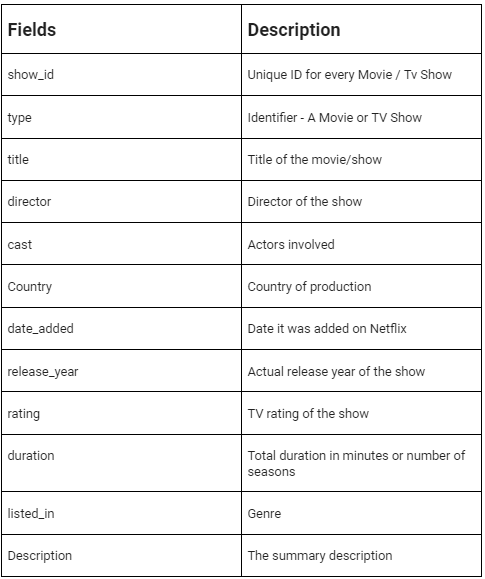

**Importing required libraries:**

In [37]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.graph_objects as map
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')
     

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Mounting the Google drive:**

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset loading**

In [39]:
netflix_data=pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [40]:
#check the information of the dataset
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [41]:
#check the description of the dataset
netflix_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [42]:
#check the first five rows of the dataset
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [43]:
#check the last five rows of the dataset
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**Duplicate values:**

In [44]:
#check the duplicate values in the dataset
len(netflix_data[netflix_data.duplicated()])

0

**Missing values:**

In [45]:
# Missing Values/Null Values Count
netflix_data.isnull().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

2389 nulls in 'director'

718 nulls in 'cast'

507 nulls in 'country'

10 nulls in 'date_added'
7 nulls in rating

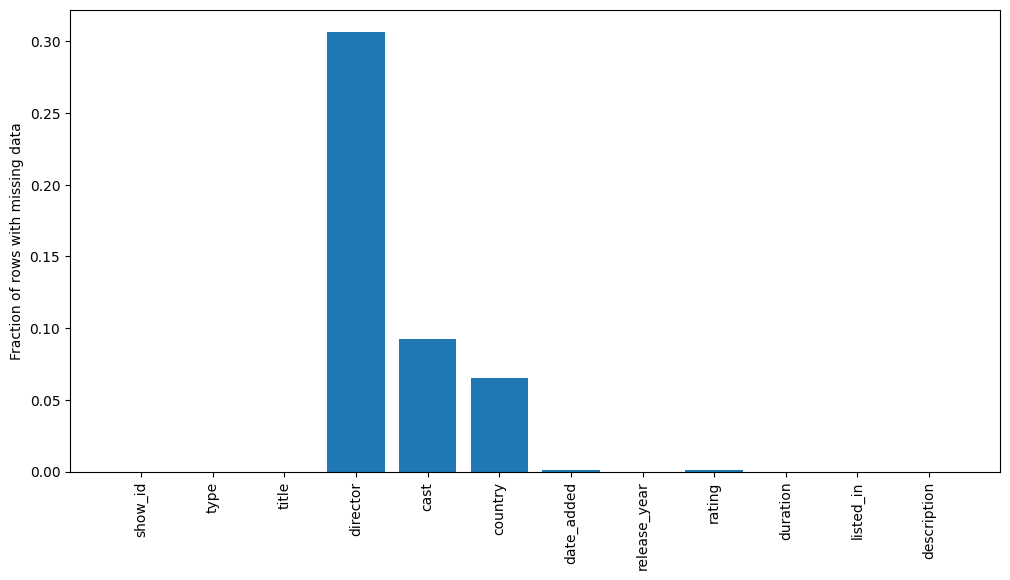

In [46]:
#check the null value distribution
null_counts = netflix_data.isnull().sum()/len(netflix_data)
plt.figure(figsize=(12,6))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()
     


In [47]:
#check the shape of the dataset
netflix_data.shape

(7787, 12)

In [48]:
#check the columns in the dataset
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [49]:
# Check Unique Values for each variable.
netflix_data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

**What did you know about your dataset?**

The dataset given is a dataset of TV Shows and Movies available on Netflix as of 2019. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

From this dataset we have to find Exploratory Data Analysis, Understanding what type content is available in different countries, Is Netflix has increasingly focusing on TV rather than movies in recent years and Clustering similar content by matching text-based features.

The above dataset has 7787 rows and 12 columns. There are some mising values so we need to handle the null values but no duplicate values in the dataset.The columns that have missing values are as follows: (1)director (2)cast (3)country (4)date_added (5)rating.

**Data wrangling:**

In [50]:
# Create a copy of the current dataset and assigning to data
data=netflix_data.copy()

# Create two data frames saperate one contains the TV Show data and second one contains the Movie data
netflix_tv=data[(data['type']=="TV Show")]
netflix_movie=data[(data['type']=="Movie")]
     

In [51]:
# convert object data to int (for purpose of classification)
netflix_movie['duration']=netflix_movie['duration'].str.replace(' min','')
netflix_movie['duration']=netflix_movie['duration'].astype(str).astype(int)

# convert object data to int (for purpose of classification)
netflix_tv['duration']=netflix_tv['duration'].str.replace(' Seasons','')
netflix_tv['duration']=netflix_tv['duration'].str.replace(' Season','')
netflix_tv['duration']=netflix_tv['duration'].str.replace('s','')
netflix_tv['duration']=netflix_tv['duration'].astype(str).astype(int)


In [52]:
# create 3 dataframe which classify the movies in to three class
long_movie= netflix_movie[netflix_movie['duration'] >= 150]
av_time_movie= netflix_movie[ (netflix_movie['duration'] < 150) & (netflix_movie['duration'] > 100 )]
short_movie= netflix_movie[netflix_movie['duration'] <= 100]

print("Number of long movies are :",len(long_movie))
print("Number of Average time movies are :",len(av_time_movie))
print("Number of Short movies are :",len(short_movie))
     

Number of long movies are : 243
Number of Average time movies are : 2191
Number of Short movies are : 2943


In [53]:
#changed date added to datetime object 
# convert "date_added" column in to datetime format
data["date_added"] = pd.to_datetime(data['date_added'])

# create two columns year and month for analysis purpose.
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [54]:
# get unique catogorties for classification

data["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [55]:
#Assigning the Ratings into grouped categories

ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)

# Find the which is the target audiance for any program.
data["target_ages"].value_counts()
     

Adults        3620
Teens         2317
Older Kids    1330
Kids           513
Name: target_ages, dtype: int64

In [56]:
# create dataframe for getting the name of actors

actor_data=data["cast"].fillna('')
actor_data.isnull().sum()

0

In [57]:
# fuction for count actor name
def convert_to_list(df):
  cast_count = {}
  cast_count_final = []
  cast_list = list(actor_data)
  for i in range(len(cast_list)):
    cast_count_final.extend(str(cast_list[i]).split(","))
  for i in cast_count_final:
    if i not in cast_count:
      cast_count[i] = cast_count_final.count(i)
  return cast_count

In [58]:
cast_data = convert_to_list(data)
casts_data = pd.DataFrame.from_dict(cast_data, orient='index', columns=['count'])

#highest number movie for actors
casts=casts_data.sort_values('count', ascending=False).drop('').reset_index()
casts
     

,index,count
0,Anupam Kher,38
1,Takahiro Sakurai,28
2,Shah Rukh Khan,27
3,Om Puri,27
4,Boman Irani,25
...,...,...
35367,Juan Manuel Diaz,1
35368,Ana Wills,1
35369,Mauricio Figueroa,1
35370,Matias Maldonado,1


In [59]:
#create dataframe for getting the name of genre

genre=data["listed_in"]
     

In [60]:
# fuction for count the genre name

def convert_to_list(netflix_data):
  genre_count = {}
  genre_count_final = []
  genre_list = list(genre)
  for i in range(len(genre_list)):
    genre_count_final.extend(str(genre_list[i]).split(","))
  for i in genre_count_final:
    if i not in genre_count:
      genre_count[i] = genre_count_final.count(i)
  return genre_count

In [61]:
genre_df = convert_to_list(data)
genre_df = pd.DataFrame.from_dict(genre_df, orient='index', columns=['count'])

#highest number genres
genre_df.sort_values('count', ascending=False)

,count
International Movies,2323
Dramas,1384
Comedies,1074
Documentaries,751
Dramas,722
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
Sports Movies,1
TV Sci-Fi & Fantasy,1


I have done many manipulation in data. First I created two dataframe on the basis of TV Show and Movies , this is because of I want to classify the Movies in to three catogories Long, Average and Short time movies.
Second one is, I created new column in which I categoried the rating.From this I found that targeted audience is Adults.

   Third one is, change the datatype of "data_added" column for analysis and also created two separate columns for further analysis Year and Months.

Other one is, I created two functions and got top actors and genres from the data

## **Data Visualisation:**

In [62]:
#Function to plot countplot
def count_plot(col, netflix_data, Order = None):
  '''This function plots the count plot for the passed feature
     Pass column name (str), Pandas DataFrame, Order (list of indexes) to plot the graph.'''
  plt.figure(figsize = (20,7))
  plt.title(f'Count plot of {col}')
  sns.countplot(x=col, data=netflix_data, order= Order)
  plt.xticks(rotation = 90)
  plt.show()

countplot will be used for the better visuallization of the observational counts of the categorical variable.

In [63]:
#Function to plot Pie chart
def pie_chart(col):

  plt.rcParams['font.size'] = 12
  plt.figure(figsize = (7,7))
  exp = (0.05,)*len(netflix_data[col].value_counts())
  netflix_data[col].value_counts().plot.pie(autopct = '%1.1f%%', explode = exp)
  plt.title(f'percentage distribution of {col}')
  plt.axis('off')
  plt.show()

Pie charts are very much useful in displaying relative proportions of multiple classes of data.

In [64]:
def col_word_cloud(col, w_df):
  ''' This function will show the WordCloud for the passed feature'''
  plt.figure(figsize = (15,7))
  text = " ".join(word for word in w_df[col])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

WordClouds offer a visible picture of text data.

**EXPLORATORY DATA ANALYSIS:**

**UNIVARIATE ANALYSIS:**

**chart-1(TV shows v/s movies):**

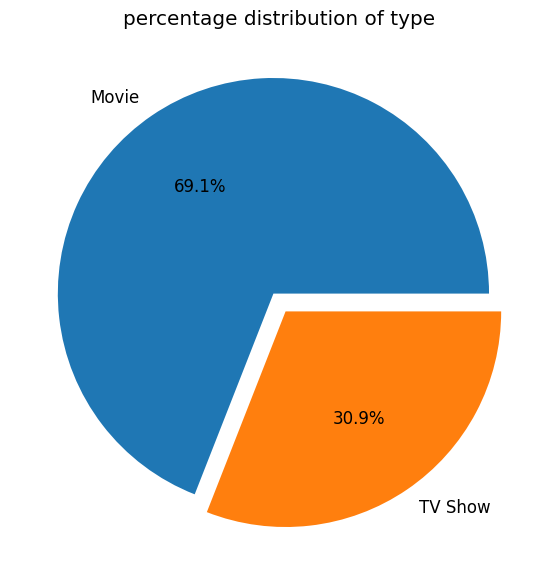

In [65]:
# Chart - 1 visualization code
pie_chart("type")

Here we get information that this dataset contains 5377 rows for Movies which is 69.1% and 2410 rows for TV Show which is 30.9%.
           From the given data we can say that the data given here is more about Movies. It is impact on clustering.From this chart we can take further decisions because this chart shows Movies are watched more than TV shows on Netflix.With its reference we can decide the next strategy.

**Chart-2**

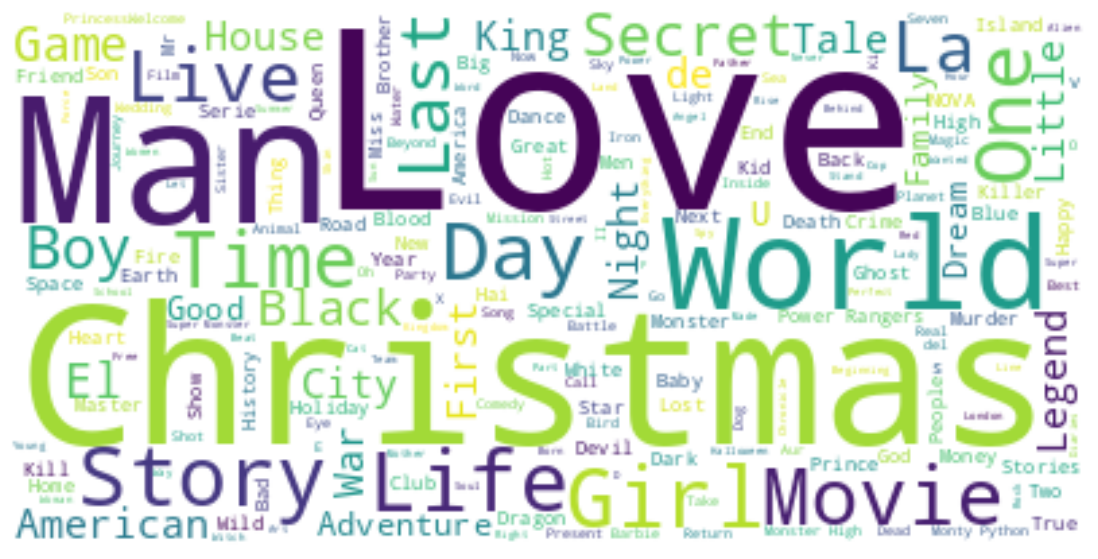

In [66]:
# Chart - 2 visualization code
col_word_cloud('title',netflix_data)

 A word cloud is a visual representation of text data using color and font size to represent the frequency of a term or topic. Wordcloud visualizations make it easy to read and understand the most prominent terms.

  It seems like words like "Christmas","Love", "Man", "World", "Story" are very common in titles.

  From this chart we can know which words occurs many times in the data.From this we can predict that what kind of data and and which type of titles for the TV Shows and Movies.

A major disadvantage here that we cannot draw any definite conclusion because it works on the frequency of the work.